----
# ┗(•̀へ •́  )ﾉ  Hyun's Code collection 
----
Authored by HyunWoo Jung

# Machine learning description

![123123](https://wordstream-files-prod.s3.amazonaws.com/s3fs-public/styles/simple_image/public/images/machine-learning1.png?SnePeroHk5B9yZaLY7peFkULrfW8Gtaf&itok=yjEJbEKD)


# ┗(•̀へ •́  )ﾉ **이것만 돌리면 다 돌아간다~~~**

In [0]:
# 기본
import numpy as np
from numpy.linalg import inv
from numpy.linalg import solve
import random

import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import openpyxl

import matplotlib.pyplot as plt
import urllib
import matplotlib.dates as mdates
from matplotlib.dates import bytespdate2num
import matplotlib.ticker as ticker
from matplotlib import font_manager, rc
from matplotlib import style
import seaborn as sns

import itertools
import re
import warnings
warnings.filterwarnings("ignore")

# 시계열 데이터 처리
import calendar
import dateutil
from dateutil.parser import parse
import datetime

# Network 분석
import networkx as nx

# 지도시각화
import folium
from folium import plugins
import html
import json
import geopy
from geopy.geocoders import Nominatim
import os
import requests
import ipywidgets
from IPython.display import Image
from ipywidgets import interact

# Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

# Factor analysis
from factor_analyzer import FactorAnalyzer

# Machine learning 용도
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import (roc_curve, auc, accuracy_score, roc_auc_score)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
import lightgbm as lgb

# Wordcloud
import konlpy
from konlpy.tag import Okt
import collections
from collections import Counter
from wordcloud import WordCloud, STOPWORDS as stopwords
from PIL import Image, ImageFilter
from wordcloud import ImageColorGenerator
import pickle

# 한글 사용하기
import matplotlib.font_manager as fm
from matplotlib import rc
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


# 크롤링
from selenium import webdriver
import requests
from bs4 import BeautifulSoup

# 기타
from urllib.request import urlopen
from tqdm import tqdm
import time

from zeep import Client

from collections import namedtuple
import sqlite3

# 한 번에 matplotlib 그림 띄우기
%matplotlib inline    
%config InlineBackend.figure_format = 'retina'  #%matplotlib 뒤에 써주면 그래프를 더 높은 해상도로 보여줌

# 설정 관련
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 0. Machine learning: Linear model

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

## >> K-fold cross validation

`from sklearn.model_selection import KFold`

- **KFold ( n_splits = , shuffle = True)**: KFold
  - n_splits: 데이터를 몇 번 나눌꺼냐
  - shuffle: 데이터를 나누기 전에 섞을건지

In [0]:
# Kfold 예시1
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))
    
sum(lasso_mse) / 10, sum(ridge_mse) / 10

################################################################################################################

# Kfold 예시2
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, 
                               scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=10, 
                              scoring='neg_mean_squared_error')
# cv: 몇 번 돌릴 것이냐. cross-validation, scoring: 점수를 측정하는 기준
np.mean(lasso_scores), np.mean(ridge_scores)

## >> Linear regression
## Linear regression이란...
- 선형회귀!
- 가장 basic!
- train data로 모델을 만들고, test data로 성능을 평가

## 빈용 메소드 모음
- **linear_model .LinearRegression ( fit_intercept = True , normalisze = True , copy_X = True , n_jobs = )**: 모델 만들어주기 
  - fit_intercept: 상수항을 넣을지 말지
  - normalize: 앞에서 scaling 해줬으면 굳이 또 안해줘도 됨
  - n_jobs: CPU를 몇 개 쓸건지 지정할 수 있다
 - **linear_model .LinearRegression . fit ( X_train , y_train )**: fit 시켜주기
   
   **.coef_**: 계수를 반환   

   **.intercept_**: y 절편을 반환
   
   **.predict ( X_test )**: : 예측하기
- **mean_squared_error ( y_true , y_pred )**: MSE 추출하기
- statsmodels를 이용해서 regression을 할 수도 있음

In [0]:
# statsmodels를 이용한 regression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

In [0]:
# Normal equation 예시1
from sklearn.linear_model import LinearRegression
lr_ne = LinearRegression(fit_intercept = True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

lr_ne.fit(X_train, y_train)

y_hat = lr_ne.predict(X_test)
y_true = y_test

mse = sklearn.metris.mean_squared_error(y_hat, y_true)

## >> GD, SGD, Ridge, Lasso

## Gradient descent란...
- 한 점에서 내려가면서 기존 값에서 계속 업데이트 해주면서 새로운 값을 적용해 최소값을 찾아내는 것

## Stodchastic gradient descent란...
- Gradient descent는 한 점을 잡고 그 점에서 내려가서 최소값을 찾는 방법이다.
- 반면 Stochastic gradient descent는 x의 값을 돌아가면서 gradient를 구해서 지역 최적화에 빠지는 것을 최소화 한다.


## **정규화를 쓰는 이유는 overfitting을 방지하기 위함이다.**
## Ridge
- regularization에서 L2 방법을 쓰는 것
- Parameter를 제곱함으로써 정규화시킨다.

## Lasso
- regularization에서 L1 방법을 쓰는 것
- Parameter에 절대값을 취함으로써 정규화시킨다.
- Lasso를 쓰면 feature selection이 가능하다.

## 빈용 메소드 모음
- **linear_model .SGDRegressor ( n_iter = , loss = ’squared_loss ’, penalty = ’l2 ’,  alpha = 0.0001 , l1_ratio = 0.15 , fit_intercept = True , max_iter = 1000 , tol = 0.001 , shuffle = True , verbose = 0 , epsilon = 0.1 , random_state = None , learning_rate = ’optimal ’ , eta0 = 0.01 , power_t = 0.25 , early_stopping = False , validation_fraction = 0.1 , n_iter_no_change = 5 , warm_start = False , average = False )**: Stochastic gradient descent
  - loss function: squared loss를 기본적으로 사용하면 된다.
  - penalty: regularization 방법. L1, L2, elastic net
  - alpha: L2 앞에 람다 값을 얼마로 설정해줄까. 이 값이 크면 클수록 regularization이 많이 되기 때문에 학습 데이터 값이 줄어든다.
  - max_iter: number of epoch. epoch을 몇 번 돌껀가
  - tol: 멈추는 기준
  - shutffle: SGD이기 때문에 섞는다. False로 하면 Batch gradient descent가 되는 것
  - learning_rate: 돌아갈 때마다 일정량 줄어들게 되는 것. 줄어드는 전략은 3개의 전략! constant, optimal, invscaling
  - eta0: learning rate을 지정. 학습속도를 빠르게 하려면 eta를 올려주면 됨. 
  - warm_start: 잘 안 쓰기는 하는데 weight의 초기값을 지정해줄 수 있다. 초기값을 기반으로 예측!

- **linear_model .LinearRegressionGD ( eta0 = , epochs = , batch-size = , shuffle = )**: gradient descent 만들기
  - eta0: learning rate
- 예시)

  **linear_model .LinearRegressionGD ( eta0 = 0.001 , epochs = 10000 , batch-size = 1 , shuffle = False)**: Gradient descent
  
  **linear_model .LinearRegressionGD ( eta0 = 0.001 , epochs = 10000 , batch-size = len(X) , shuffle = False)**: Batch gradient descent
  
  **linear_model .LinearRegressionGD ( eta0 = 0.001 , epochs = 10000 , batch-size = 1 , shuffle = True)**: Stochasic gradient descent
  
  **linear_model .LinearRegressionGD ( eta0 = 0.001 , epochs = 10000 , batch-size = 100 , shuffle = True)**: Mini-batch stochasic gradient descent
  
- **linear_model .Lasso ( alpha = 1.0, fit_intercept = True , normalize = False , precompute = False , copy_X = True , max_iter = 1000 , tol = 0.0001 , warm_start = False , positive = False , random_state = None , selection = ’cyclic ’)**: Lasso

- **linear_model.Ridge ( alpha = 1.0 , fit_intercept = True , normalize = False , copy_X = True , max_iter = None , tol = 0.001 , solver = ’auto ’, random_state = None )**: Ridge
  - solver: auto로 하면 데이터를 보고서 fitting을 할 때 어떤 알고리즘을(normal equation, SGD) 알아서 찾아준다.

In [0]:
# Lasso 예시1
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

In [0]:
# Ridge 예시1
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

In [0]:
# 기본 Code
for epoch in range(epoches):
  X_copy = np.copy(X)
  if is_SGD:
    np.random.shuffle(X_copy)
  batch = len(X_copy) // BATCH_SIZE
  for batch_count in range(batch):
    X_batch = np.copy(
    X_copy[batch_count*BATCH_SIZE : (batch_count+1)*BATCH_SIZE])
    # Do weight Update
  print("Number of epoch : {}".format(epoch))

In [0]:
# Stochastic gradient descent 예시1
from sklearn.linear_model import SGDRegressor
lr_SGD = SGDRegressor()

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

from sklearn.mode_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

lr_SGD.fit(X_train, y_train)

y_hat = lr_SGD.predict(X_test)
y_true = y_test

mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
# rmse값이 엄청나게 커졌다는 것은 학습이 잘 안 되었다는 뜻! learning rate이 너무 크다거나 충분히 돌지 못했을 때 발생

# scaled된 data로 돌리면
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state=42)

lr_SGD.fit(X_train, y_train)

y_hat = lr_SGD.predict(X_test)
y_true = y_test

mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
# rmse값이 안정적으로 나오게 된다. 즉 SGD regression을 할 때는 반드시 scaling을 해야 한다!

## >> Polynomial regression

## Polynomial regression이란.....??
- 1차식이 아닌 다항식! 비선형 관계 예측에 용이!

## 빈용 메소드 모음
- **PolynomialFeatures ( degree = )**: polynomial feature 만들어주기. degree가 2이면 제곱항까지 만들어줄 것을 의미
- **PolynomialFeatures .fit_transform ( 데이터 )**: polynomial feature로 바꿔주기

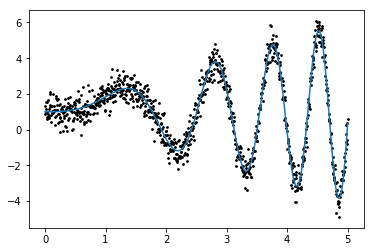

In [0]:
# 예시1 
import numpy as np
import matplotlib.pyplot as plt

def f(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1
    return (x,y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size)*0.5
    return (x,y)
  
  

f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s=3, c="black")
plt.show()

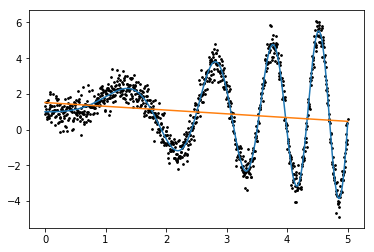

In [0]:
# 예시1 
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape, y.shape

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

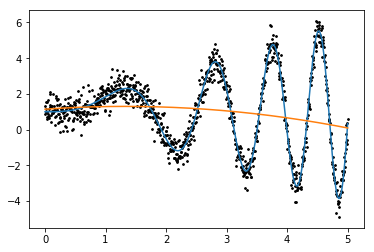

In [0]:
# 예시1 
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly,y)

f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

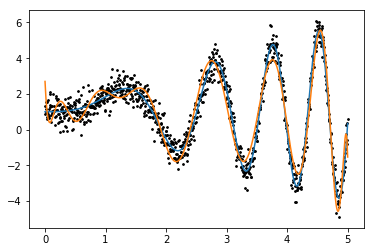

In [0]:
# 예시1 
poly_features = PolynomialFeatures(degree=16)
X_poly = poly_features.fit_transform(X)
X_poly[:3]

lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly,y)
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [0]:
# 가장 적합한 모델 찾기
# Linear regression, Ridge, Lasso 3개 중에서 10~49까지.

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

poly_range = list(range(10, 50))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)

    lr = LinearRegression(fit_intercept=False)
    lr.fit(X_poly,y)
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso(fit_intercept=False)
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    ridge = Ridge(fit_intercept=False)
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))
    
import pandas as pd
from pandas import DataFrame
data = {"poly_range":poly_range, "lr_rmse":rmse_lr_list, 
        "lasso_rmse":rmse_lasso_list,"ridge_rmse":rmse_ridge_list}
df = DataFrame(data).set_index("poly_range")
df

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2400.2274159729322, tolerance: 0.5460943105172318
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2408.860136931154, tolerance: 0.5460943105172318
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.85543e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2406.814493176081, tolerance: 0.5460943105172318
  positive)
/usr/local/lib/python3.6/dist-

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.908540,2.294458,1.936648
11,1.899772,2.295308,1.917277
12,1.637873,2.295093,1.916812
13,1.365971,2.294353,1.890192
14,1.348537,2.293067,1.624377
15,0.927390,2.291625,1.493108
16,0.705838,2.290287,1.503377
17,0.663773,2.289180,1.295161
18,0.689606,2.288365,0.873456


In [0]:
print(df.min())
df["ridge_rmse"].sort_values().head()

lr_rmse       0.551585
lasso_rmse    2.287534
ridge_rmse    0.506790
dtype: float64


poly_range
22    0.506790
24    0.507277
23    0.518933
21    0.602170
20    0.736622
Name: ridge_rmse, dtype: float64

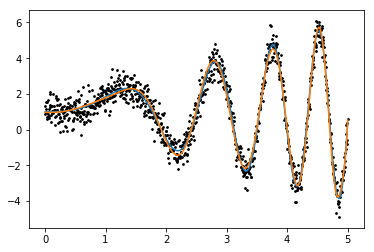

In [0]:
poly_features = PolynomialFeatures(degree=22)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
ridge.fit(X_poly,y)

f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()

## >> Logistic regression

## Logistic regression이란.....??
- binary 형태로 예측을 하는 regression

## 빈용 메소드 모음
- **PolynomialFeatures ( degree = )**: polynomial feature 만들어주기. degree가 2이면 제곱항까지 만들어줄 것을 의미
- **PolynomialFeatures .fit_transform ( 데이터 )**: polynomial feature로 바꿔주기
- statsmodels을 이용할 수도 있음

In [0]:
# Logistic regression 에시
# 먼저 데이터를 반응변인과 예측변인으로 분리하기
Y = (df['Status'] == 'Developed').astype(np.int) #'Developed'면 1, 아니면 0으로
X = df.drop('Status', axis=1)

# 예측변인과 반응변인을 train set과 test set으로 분리해 줍니다.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.linear_model import LogisticRegression

# 1. 먼저 모델을 만들어 줍니다.
logReg = LogisticRegression()

# 2. 모델 적합시킵니다.
logReg.fit(X_train, y_train)

# 3. 트레이닝셋과 테스트셋에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
print('Training R^2:', logReg.score(X_train, y_train))
print('Test R^2: ', logReg.score(X_test, y_test))

# 모델로부터 반응을 예측하고 accuracy, f1-score, confusion matrix를 구해봅시다.
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
y_pred = logReg.predict(X_test)
print("Accuracy: %.2f" %accuracy_score(y_test, y_pred))
print("F1 score: %.2f" %f1_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

In [0]:
import statsmodels.api as sm
model = sm.Logit(y_train, X_train)
results = model.fit()
results.summary()

## >> Softmax function

## Softmax란??

Logistic이 binary만 예측이 가능했다면 softmax는 여러 class를 예측할 수 있다.

In [0]:
# softmax regression 예시1
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

# predict
softmax_reg.predict([[5, 2]])

# predict probability
softmax_reg.predict_proba([[5, 2]])

# 0. Machine learning: Linear model (with Pytorch)

In [0]:
import torch
import numpy as np

## 빈용 메소드 모음
- **Basic**
  - **torch .FloatTensor()** : matrix를 생성하는 메소드
  - **.matmul( )** : 행렬간의 곱을 구해줌
  - **.mul( )** : 행렬간의 사이즈를 늘려서 맞춘 다음 곱을 해줌

    *: 같은 결과를 반환
  - **.mul_()**: in-place operation. 기존 tensor를 변환시킨다.
  - **.mean ( dim = )** : 평균을 구해줌. dimension을 선택해줄 수도 있음
  - **.sum ( dim = )** : 합을 구해줌. dimension을 선택해줄 수도 있음
  - **.max ( dim = )** : 최대값을 구해줌. dimension을 선택해줄 수도 있음
  - **.max ( dim = )[ 1 ]**: argmax. 즉 최대값의 index를 반환해줌
  - **.view ( )**: reshape과 비슷. 원하는 형태로 tensor를 바꿔줄 수 있다.
  - **.squeeze ( )**: view와 비슷하나, dimension의 element의 개수가 1인 경우에 그 dimension을 없애준다.
  - **.unsqueeze ( dim = )**: squeeze를 반대로 해줌. 원하는 dimension에 1을 넣어준다. 꼭 dimension을 명시해줘야 한다.
  - **torch .ones_lie ( )** : 같은 사이즈이되 1로 찬 tensor를 반환
  - **torch .zeros_lie ( )** : 같은 사이즈이되 0로 찬 tensor를 반환
  
- **Type Casting**
   - **.Longtensor ( )** : int(?) 형태로 저장한다.
   - **.ByteTensor ( )** : Boolean 형태로 저장한다.
   - **.long ( )** : long tensor로 바꿔줌
   - **.float ( )** : float tensor로 바꿔줌

- **Concatenate, Stacking**
 - **torch .cat ( [ ,  ] , dim = )** : 2개의 tensor를 합쳐주는 방법
 - **torch . stack ( [ , ] , dim = )** : 쌓아라! list형태로 tensor를 쌓아라! dim은 어떻게 쌓을지를 말해준다.

In [0]:
# in-place operation
x = torch.FloatTensor([[1,2],[3,4]])
print(x.mul(2.))
print(x)
print(x.mul_(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


In [0]:
m1 = torch.FloatTensor([[3,3]])
m2 = torch.FloatTensor([[2,2]])
print(m1 + m2)

tensor([[5., 5.]])


In [0]:
# 사이즈가 맞지 않지만 차원을 알아서 늘려서 실행을 해준다.
m1 = torch.FloatTensor([[1,2]])
m2 = torch.FloatTensor([[3],[4]])
print(m1+m2)

tensor([[4., 5.],
        [5., 6.]])


In [0]:
# Multiplication vs Matrix Multiplication
m1 = torch.FloatTensor([[1, 2],[3, 4]])
m2 = torch.FloatTensor([[1],[2]])
print(m1.matmul(m2))
print(m1 * m2)
print(m1.mul(m2))

tensor([[ 5.],
        [11.]])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


In [0]:
# .mean() 예시1
t = torch.FloatTensor([1,2])
print(t.mean())

# .mean() 예시2
t = torch.FloatTensor([[1,2],[3,4]])
print(t.mean())
print(t.mean(dim=0))
print(t.mean(dim=1))
print(t.mean(dim=-1))

tensor(1.5000)
tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


In [0]:
print(t.sum())
print(t.sum(dim=0))
print(t.sum(dim=1))
print(t.sum(dim=-1))

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


In [0]:
# argmax: 최대값의 index를 반환
t = torch.FloatTensor([[1,2],[3,4]])
print(t.max())

tensor(4.)


In [0]:
print(t.max(dim=0))
print('Max: ',t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


In [0]:
# view 예시 1
t = np.array([[[0,1,2],
               [3,4,5]],
              
              [[6,7,8],
               [9,10,11]]])
ft = torch.FloatTensor(t)
ft.shape

torch.Size([2, 2, 3])

In [0]:
print(ft.view([-1,3]))
print(ft.view([-1,3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [0]:
print(ft.view([-1,1,3]))
print(ft.view([-1,1,3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


In [0]:
# .squeeze() 예시
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])
tensor([0., 1., 2.])
torch.Size([3])


In [0]:
# .unsqueeze() 예시
ft = torch.Tensor([0,1,2,])
print(ft.shape)

torch.Size([3])


In [0]:
print(ft.unsqueeze(dim = 0))
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [0]:
print(ft.view(1,-1))
print(ft.view(1,-1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [0]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [0]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [0]:
# concat, .cat() 예시
x = torch.FloatTensor([[1,2], [3,4]])
y = torch.FloatTensor([[5,6], [7,8]])
print(torch.cat([x,y],dim=0))
print(torch.cat([x,y],dim=1))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


In [0]:
# .stack() 예시
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])
print(torch.stack([x,y,z]))
print(torch.stack([x,y,z], dim=1))
print(torch.cat([x.unsqueeze(0),y.unsqueeze(0),z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [0]:
# .ones_like(), .zeros_like() 예시
x = torch.FloatTensor([[0,1,2],[2,1,0]])
print(x)
print(torch.ones_like(x))
print(torch.zeros_like(x))

tensor([[0., 1., 2.],
        [2., 1., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Linear Regression with Pytorch
- Basic
  - **torch .zeros ( , requires_grad = True )** : 초기화 시킬 때 사용, requires_grad=True는 학습할 것이라고 pytorch에게 명시하는 것  
- **torch.optim**: 모델을 개선시킬 때 사용하는 라이브러리
  - **opotim.SGD( [ , ], lr = )** : Stochastic gradient descent를 사용하기
  - **zero_grad ( )**: gradient를 초기화
  - **backward ( )**: gradient를 계산
  - **step ( )**: 개선된 gradient의 방향대로 W(weight), b(bias)를 개선한다.

In [0]:
import torch.optim as optim

In [0]:
## Linear regression 예시
# x: 공부시간, y: 시험성적
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

# hypothesis를 설정하기
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr = 0.01)

nb_epochs = 1000
for epoch in range(1, nb_epochs+1):
  hypothesis = x_train*W + b
  # cost 구하기
  cost = torch.mean((hypothesis - y_train)**2)
  
  # 모델 개선 by.stochastic gradient descent
  optimizer.zero_grad()    # hypothesis 예측
  cost.backward()    # Cost 계산
  optimizer.step()    # optimizer로 학습

## Gradient Descent with Pytorch
- Basic
  - **torch .zeros ( , requires_grad = True )** : 초기화 시킬 때 사용, requires_grad=True는 학습할 것이라고 pytorch에게 명시하는 것  
- **torch.optim**: 모델을 개선시킬 때 사용하는 라이브러리
  - **opotim.SGD( [ , ], lr = )** : Stochastic gradient descent를 사용하기
  - **zero_grad ( )**: gradient를 초기화
  - **backward ( )**: gradient를 계산
  - **step ( )**: 개선된 gradient의 방향대로 W(weight), b(bias)를 개선한다.

In [0]:
## Gradient Descent 예시
# 데이터
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

# 모델 초기화
W = torch.zeros(1, requires_grad  = True)
# optimizer 설정
optimizer = optim.SGD([W], lr=0.15)

nb_epochs = 10
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = x_train * W

  # cost 계산
  cost = torch.mean((hypothesis - y_train)**2)

  print('Epoch {:4d}/{} W: {:.3f} Cost: {;.6f}'.format(epoch, nb_epochs, W.titem(),cost.item()))

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

## Multivariate Linear Regression  with Pytorch
- Basic
  - **.matmul ( )** : x의 길이가 바뀌어도 코드를 바꿀 필요가 없고 속도도 더 빠르다.

In [0]:
## Multivariate linear regression 예시
# 데이터
x_train = torch.FloatTensor([73, 80, 75],
                            [93, 88, 93],
                            [89, 91, 90],
                            [96, 98, 100],
                            [73, 66, 70])
y_train = torch.FloatTensor([[152],[180],[196],[142]])

# 모델 초기화
W = torch.zeros((3,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=le-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = x_train.matmul(W) + b

  # cost 계산
  cost = torch.mean((hypothesis - y_train)**2)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{} W: {:.3f} Cost: {;.6f}'.format(epoch, nb_epochs, W.titem(),cost.item()))

# 0. Machine learning: Loss function, Fitting, Validation, Model evaluation

## Loss function vs Cost function vx Objective function


![123123](https://postfiles.pstatic.net/MjAxODEwMjdfMjQ4/MDAxNTQwNjQxMDM2Nzk2.BBIktuYfZGDOltDPfnFZtGtGyAytqArZhHrc2uh2vCMg.Amk9px-LZyU2cH9WTmHwv_NA38VsVtgtV49FRbhRnX0g.PNG.qbxlvnf11/20181027_205024.png?type=w773)
- Loss function은 data point! single data set을 다룬다는 느낌이다!

![123123](https://postfiles.pstatic.net/MjAxODEwMjdfMTI3/MDAxNTQwNjQxMzQ3NDIy.Ud2tujcppuIOyhBsUgdf1X3eu9Ea-6K2zZfdqONRLiAg.RcUTI8Da51xFVHWXMsJsEjAJ_tTo6IaFoddR4MACVIgg.PNG.qbxlvnf11/20181027_205501.png?type=w773)
- Cost function은 loss function의 합이다. 즉 entire data set을 다루는 것이다.
- 순간순간의 loss를 판단할 땐 loss function, 학습이 완료된 후에는 cost function!

![123123](https://postfiles.pstatic.net/MjAxODEwMjdfMjM1/MDAxNTQwNjQxMzQ3NDU2.cpPY6GJ0oeJLiz4h_Xs3pKVuv5V5f32aHSfbfX_rsEgg.a2QE606kUdtjPVt2JBlbpB4ZtgQST06b1dZN9KqOnSkg.PNG.qbxlvnf11/20181027_205532.png?type=w773)
- 총 정리
  - A loss function **is a part of** a cost function **which is a type of** an objective function!!!

## 과대적합(Overfitting)과 과소적합(Underfitting)


**과대적합(Overfitting)**은 모델이 Train Dataset에 너무 잘 맞아서 일반성이 떨어지게 되는 문제입니다. 즉 Train Dataset을 너무 과하게 학습해 학습되지 않은 데이터가 들어오면 분류하지 못하게 되는 문제를 일으킵니다. 아래 그림의 오른쪽 그림들이 과대적합의 예시라고 할 수 있습니다. 보시다시피 Train Set을 거의 다 거치거나 분류해내며 굉장히 높은 성능을 보여주고 있지만, 새로운 변수에 대응하기 어렵습니다.
<br>
**과소적합(Underfitting)**은 반대의 개념이라고 할 수 있습니다. 모델이 너무 단순해서 데이터의 내재된 구조를 학습하지 못할 때 발생하는 것입니다. 아래의 왼쪽 그림을 보시면 쉽게 이해할 수 있을 것입니다.
<br>
![123123](https://mblogthumb-phinf.pstatic.net/MjAxODA3MzBfMjMy/MDAxNTMyODkwNjUxMjY4.H_ocFIRFaG8MWrBsv8BWrTCaAMGLMKZZUh_Rd1krRLog.HAZRdDtrQMvVGKiEWfGls8bm0EhTyRKf7XzoSY1Cibsg.JPEG.qbxlvnf11/maxresdefault.jpg?type=w800)

## Bias와 Variance

위에 설명한 과대적합과 과소적합을 극복하기 위해 간단히 bias와 variance의 개념을 살펴봅시다.

![bias](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile9.uf.tistory.com%2Fimage%2F99CDCC33599AC28F075E3C)

Bias는 실제 값에서 멀어진 척도, Variance는 예측된 값들이 서로 얼마나 멀리 떨어져 있는지에 대한 척도로 보시면 되겠습니다. 
우리의 목표는 당연히 Bias도 낮고, Variance도 낮게, 즉 모두 정확하게 예측하는 왼쪽 위의 그림입니다. Overfitting 모델은 high variace 모델이라고도 하는데(오른쪽 위), Train Data의 지엽적인 특성까지 반영되어 학습된 것은 잘 예측하지만, **학습되지 않은 데이터에 대해서는 예측력이 떨어지게 됩니다.** Underfitting 모델은 High Bias 모델이라고 하는데(왼쪽 아래), 너무 적은 특성만을 반영하여, 예측의 범위가 좁고 정확도가 떨어지게 됩니다.

다시 말하면, Bias 에러가 높아지는 것은 많은 데이터를 고려하지 않아(=모델이 너무 단순해) 정확한 예측을 하지 못하는 경우를 말하고, Variance(분산) 에러는 노이즈까지 전부 학습해(=모델이 너무 복잡해) 약간의 input에도 예측 Y 값이 크게 흔들리는 것을 말합니다. 이 두가지 에러가 **Trade-off** 관계에 있어서 이 둘을 모두 잡는 것은 불가능 한 딜레마가 생긴다.

![graph](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile9.uf.tistory.com%2Fimage%2F996DB433599AC34225B9BD)

그렇다면 어떻게 Total Error가 최소인 지점을 찾을 수 있을까요? 효과적인 방법은 **Validation Set을 만드는 것**인데, 바로 살펴보겠습니다!

## 데이터를 train, valid, test로 나누어 사용하기

#### Validation Set?
![datasets](https://t1.daumcdn.net/cfile/tistory/9951E5445AAE1BE025)

우리는 머신러닝/딥러닝의 모델을 학습시키기 위해서는 전체 데이터를 train dataset과 test dataset으로 나누고, train dataset으로 학습한 뒤, test dataset을 통해 이 모델이 제대로 동작하는지 검증하는 과정을 거친다고 배웠습니다.<br>
그렇다면 Validation set은 무엇이며, 왜 필요할까요? Validation Set을 통해 우리는 모델의 성능을 대략적으로 파악할 수 있습니다. Train Set의 일부를 떼어낸 후, 남은 부분을 학습한 뒤, 모델을 통해 떼어낸 부분에 대한 예측을 도출합니다. 우리는 떼어낸 부분의 실제 값을 알고 있기 때문에 예측치와 비교하여 성능을 평가하는 여러 측정 공식을 통해 모델의 성능을 알아봅니다. 그러니 Validation Set은 모의고사 문제라고 보시면 되겠습니다.



### 교차검증(Cross Validation) vs 홀드아웃 검증(Hold-out Validation)

### Cross Validation

그렇다면 Validation Set을 만드는 대표적인 두 유형에 대해 알아보겠습니다. 위에서 Validation Set을 만들 때, Train set에서 일부분을 뗴어 내 그것을 Validation Set으로 설정한다고 했습니다. 그러나 Validation Set을 뗄 만큼 데이터셋이 크지 않다면 어떻게 할까요? 이때는 너무 많은 양의 데이터를 Validation Set으로 뺏기지 않게 하기 위해 일반적으로 **Cross Validation** 이라 하는 기법을 사용합니다. Training Set을 여러 Subset으로 나누고 각 모델을 이 Subset의 조합으로 훈련시키고 나머지 부분으로 검증합니다.

![validation](https://t1.daumcdn.net/cfile/tistory/990DD2465B72F1491E)

In [0]:
from sklearn.model_selection import KFold
from sklearn import metrics
X = np.arange(16).reshape((8,-1)) ## 8개의 row, 2개의 column
y = np.arange(8).reshape((-1,1))
kf = KFold(n_splits=4) # 8개의 row를 각각 2줄짜리 4개의 set으로 분리합니다
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

# 각각의 iteration을 print합니다. 첫 줄의 의미는 2~7번째 row를 학습하고 0,1번째 row를 validation set으로 하여 검증한다는 것입니다.

### Hold-out Validation


Original Set을 무작위로 training set과 validation set, test set으로 구분한 뒤, training set과 validation set을 이용해 분석 모형을 구축하고, test set을 이용하여 분석 모형의 성능을 평가하는 방법입니다.<br><br>
Hold-out Validation의 전체적인 pipeline은 다음과 같습니다.
1. Original Set을 무작위로 training set과 validation set, test set으로 구분합니다.
2. 하이퍼파라미터를 여러가지로 튜닝해 여러가지 세팅을 만들어본 뒤, 학습 알고리즘을 사용해 Training set에 모델을 학습시킵니다. 하이퍼파라미터 세팅에 대해서는 나중에 더 배우도록 하겠습니다.
3. Validation Set로 모델의 성능을 평가합니다. 가장 좋은 성능을 기록한 하이퍼파라미터 세팅을 선택합니다.
4. Training Set은 보통 클수록 좋습니다. 그러므로 모델 선택 후에 Training Set와 Validation Set을 합쳐 더 큰 데이터셋으로 3에서 선택한 최선의 하이퍼파라미터 세팅을 사용한 모델을 학습합니다.
5. 이제 Test Set을 사용해 모델의 성능을 평가합니다.
<br>

<br>
Cross Validation과의 가장 큰 차이점은 Hold-out Validation에서 Test Set의 경우, 모형에는 영향을 주지 않고, 모델의 성능 측정 만을 위해 사용된다는 점입니다.
    

## 측정공식(Evaluation Metric) vs 비용함수(Cost Function)

* F1 score, precision, recall, accuracy, ROC, AUC
  - https://frhyme.github.io/machine-learning/clf_%ED%8F%89%EA%B0%80%ED%95%98%EA%B8%B0/

### 1) 분류 모델
<img src="https://t1.daumcdn.net/cfile/tistory/99DC064C5BE056CE10" alt="Drawing" style="width: 500px;"/>

모델(분류기)의 성능을 평가하는 더 좋은 방법은 Coufusion Matrix(오차행렬)을 만들어보는 것입니다. 정답이 True/False로 나누어져 있고, 모델 또한 True/False의 답을 내놓습니다. 그렇다면 위와 같이 2x2의 행렬이 만들어지겠죠? 각 case별로 살펴본다면 다음과 같습니다.<br>
- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답)
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답)
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답)
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답)<br>

그렇다면 confusion matrix를 통해 우리의 분류 모델 성능을 어떻게 평가할 수 있을까요? 손으로 쓴 숫자가 '3'인지 아닌지 분류하는 아주 간단한 모델을 만든다고 가정하고, 이 모델의 성능을 여러 지표로 확인해보겠습니다.
<img src="mnist3.png" alt="Drawing" style="width: 500px;"/>

### 정확도(accuracy)


정확도(accuracy)는 전체 샘플 중 맞게 예측한 샘플 수의 비율을 뜻합니다. 높을수록 좋은 모형입니다. 일반적으로 학습에서 최적화 목적함수로 사용됩니다.

$$accuracy=\frac{TP+TN}{TP+TN+FP+FN}$$<br>
그러나, 정확도(Accuracy)의 가장 큰 문제점은, **클래스의 분포가 같을 때만 이용 가능하다는 점입니다**. 정답이 3일 때의 정확도는 5/7= 71.4%이지만, 정답이 3이 아닐 때의 정확도는 2/3 = 66.7%입니다. 전체 정확도를 70%라고 말한다면, 3이 아닐 때의 정확도가 미미하게 반영된다는 문제점이 있습니다.<br>
이러한 **단점을 보완**하는 지표가 정밀도(Precision)와 재현율(Recall), ROC 곡선과 AUC입니다.

In [0]:
from sklearn.metrics import accuracy_score
y_true = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred = [0, 0, 1, 0, 0, 1, 1, 1, 1, 1]

accuracy_score(y_true, y_pred)

### 정밀도(precision)

정밀도(precision)은 positive 클래스에 속한다고 분류한 샘플 중 실제로 positive 클래스에 속하는 샘플 수의 비율을 말한다. 높을수록 좋은 모형입니다.

$$precision=\frac{TP}{TP+FP}$$

In [0]:
from sklearn.metrics import precision_score
y_true = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred = [0, 0, 1, 0, 0, 1, 1, 1, 1, 1]

precision_score(y_true, y_pred)

### 재현율(recall)


재현율(recall)은 실제 positive 클래스에 속한 표본 중에 positive 클래스에 속한다고 출력한 표본의 수의 비율을 뜻합니다. 높을수록 좋은 모형이다. TPR(true positive rate) 또는 민감도(sensitivity)라고도 합니다.

$$recall=\frac{TP}{TP+FN}$$

In [0]:
from sklearn.metrics import recall_score
y_true = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred = [0, 0, 1, 0, 0, 1, 1, 1, 1, 1]

recall_score(y_true, y_pred)

### F Score, F1 score


**정밀도**와 **재현율**의 **가중조화평균**을 F Score라고 합니다. 정밀도에 주어지는 가중치를 베타(beta)라고 합니다.

$$F_β=\frac{(1+β^2)(precision*recall)}{β^2precision+recall}$$
 
베타가 1인 경우를 특별히 F1 Score라고 합니다.

$$F_1=\frac{2⋅precision⋅recall}{precision+recall}$$


In [0]:
from sklearn.metrics import f1_score
y_true = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred = [0, 0, 1, 0, 0, 1, 1, 1, 1, 1]

f1_score(y_true, y_pred)

sklearn 패키지의 metrics 패키지에서는 정밀도, 재현율, F1점수를 구하는 `classification_report` 명령을 제공합니다. 이 명령은 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모형의 성능을 평가합니다.

In [0]:
from sklearn.metrics import classification_report

y_true = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred = [0, 0, 1, 0, 0, 1, 1, 1, 1, 1]

print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

### ROC와 AUC

ROC 곡선에 대해 설명하기 위해 일단 다음의 두 가지 개념에 대해 먼저 알아보겠습니다.<br>
위에서 설명한 재현율(Recall)은 참 양성 비율(True Positive Rate, **TPR**)이라고도 하며, 다음과 같이 정의됩니다. $$TPR=\frac{TP}{TP+FN}$$<br>
거짓 양성 비율(False Positive Rate, **FPR**)은 다음과 같이 정의됩니다.
$$FPR=\frac{FP}{FP+TN}$$<br>
TPR과 FPR은 반비례 관계에 있습니다. 3인지 아닌지 판단할 때, 조금만 3처럼 보여도 모두 3이라고 분류할 경우, 이 때의 TPR은 1에 가까워질 것입니다. 그러나 반대로 FPR은 매우 낮아지겠죠? 반대로 조금만 비슷하지 않아도 모두 3이 아니라고 분류할 경우 TPR은 급격히 낮아져 0에 가까워지겠지만, FPR은 반대로 급격히 높아져 1에 가까워질 것입니다(3이라고 분류 자체를 안하므로, 잘못 분류하는 경우가 없는 것). 이처럼 TPR과 FPR은 어떤 기준(언제 3이라고 예측할까?)을 연속적으로 바꾸며 측정해야 합니다. 이를 한눈에 볼 수 있게 한 것이 바로 **ROC 곡선**입니다. 
![ROC_curve](https://t1.daumcdn.net/cfile/tistory/262E8E3F544837AD27)<br>
위 그림처럼, ROC 곡선은 TPR과 FPR이 둘다 [0,1]의 범위이며, (0,0)에서 (1,1)을 잇는 곡선입니다. 이때 **ROC 곡선 아래 부분의 면적**을 **AUC(Area Under Curve)**라 하며 이 값이 1에 가까울수록 성능이 좋습니다.

In [0]:
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

#### 시각화

In [0]:
import matplotlib.pyplot as plt 

from sklearn.metrics import accuracy_score, precision_score, precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression

def learn_and_eval_clf(x, y_true):
    clf = LogisticRegression(random_state=42)
    clf.fit(x, y_true)

    y_pred = clf.predict(x)
    print("accuracy_score: {}".format( accuracy_score(y_true, y_pred)))
    print("precision_score: {}".format( precision_score(y_true, y_pred)))
    #print("AUC: Area Under Curve: {}".format(roc_auc_score(y_true, y_pred_proba[:, 1])))
    #print("Classificcation Report: \n{}".format(classification_report(y_true, y_pred)))
    #print("Confusition matrix: \n{}".format(confusion_matrix(y_true, y_pred)))

    y_score = clf.decision_function(x)
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    fpr, tpr, _ = roc_curve(y_true, y_score)

    f, axes = plt.subplots(1, 2, sharex=True, sharey=True)
    f.set_size_inches((8, 4)) 
    axes[0].fill_between(recall, precision, step='post', alpha=0.2, color='b')
    axes[0].set_title('Recall-Precision Curve')

    axes[1].plot(fpr, tpr)
    axes[1].plot([0, 1], [0, 1], linestyle='--')
    axes[1].set_title('ROC curve')
    #plt.save
    return f

## - 임의로 각각 평균이 0.0, 0.25인, 큰 차이가 나지 않는 샘플들을 뽑아서, 분류해본다. 

sample_size = 100
x = np.vstack(
    [np.random.normal(0, 1, sample_size*2).reshape(sample_size, 2), 
     np.random.normal(0.25, 1, sample_size*2).reshape(sample_size, 2), 
    ]
)
y_true = np.array([0 for i in range(0, sample_size)]+[1 for i in range(0, sample_size)])


try1 = learn_and_eval_clf(x, y_true)

### 임의로 각각 평균이 0.0, 2인, 큰 차이가 나지 않는 샘플들을 뽑아서, 분류해본다. 

sample_size = 100
x = np.vstack(
    [np.random.normal(0, 1, sample_size*2).reshape(sample_size, 2), 
     np.random.normal(2, 1, sample_size*2).reshape(sample_size, 2), 
    ]
)
y_true = np.array([0 for i in range(0, sample_size)]+[1 for i in range(0, sample_size)])
try2 = learn_and_eval_clf(x, y_true)

### 2) 회귀 모델
이번에는 회귀 모델의 성능을 평가하는 방법에 대해 알아보겠습니다. 수치(float)값을 예측하는 모델은 Accuracy 등의 분류 모델 평가 기준으로 평가하는 것이 애매합니다. 분류 모델은 맞게 분류했는지/아닌지만 평가하면 되지만, 회귀모델은 정확하게 예측하지 못했더라도, 정답과 비슷하게 맞추면 성능이 좋다고 평가해야 합니다.

#### MAE(Mean Absolute Error)

In [0]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_predict)

#### MSE(Mean Squared Error)

In [0]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_predict)

#### MAPE


Scale Dependent Error의 단점을 보완하기 위한 방법입니다. 하지만 MAPE 역시 실제 예측 값이 1보다 작을 경우 분모가 작아져 무한대에 가까워질 수 있다는 단점이 있습니다.

In [0]:
from sklearn.utils import check_arrays
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = check_arrays(y_true, y_pred)

    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 0. Machine learning: Dimensinality Reduction

## 차원축소(Dimensinality Reduction)이란....?

- 차원의 저주를 해결하기 위해 feature를 줄여주는 과정.
- Feature를 줄이면 속도는 빨라지지만, 정보가 줄어들기 때문에 약간의 성능 저하가 있을 수 있어서 차원 축소를 하기 전에 먼저 Original data를 training 시켜보는 것이 좋다. 사람들은 2차원 까지만 생각할 수 있기 때문에 데이터 시각화에도 유용하다. 차원 축소는 대표적으로 PCA와 LLE가 있다.
- 모델을 학습시키기 전에 학습 데이터셋의 차원을 감소시키면 학습 속도는 빨라지지만 모델의 성능은 항상 더 낫거나 간단한 모델이 되는 것은 아니다. 이것은 데이터셋이 어떠한 모양을 하고 있느냐에 따라 달라진다.

## Curse of Dimensionality<br>
- 차원이 커지면 커질수록 데이터 간의 거리가 멀어진다. 그래서 그래프 상으로 보게 되면 엄청 떨어져 있는 모습을 볼 수 있다. 이 상태로 모델을 돌리면 overfitting 될 가능성이 크다. 첫번째 방법은 feature만큼 row를 늘려줘서 density를 올려주는 방법이 있는데, 이는 row가 너무 많아질 가능성이 있기 때문에 좋은 방법은 아니다. 그래서 가장 많이 사용하는 방법은 Projection과 Manifold 방식이다. 

![123123](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F99FF9F335B8A484A31820B)



## PCA란?
- PCA(Principal Component Analysis)는 주성분 분석이라고도 하며 고차원 데이터 집합이 주어졌을 때 원래의 고차원 데이터와 가장 비슷하면서 더 낮은 차원 데이터를 찾아내는 방법
- 차원축소 방법이다. 최적의 초평면을 찾고, 그 다음에 data를 그 초평면에 projection 시켜주는 방식이다. 


### 분산보존

최적의 lower-dimension hyperplane을 찾는 기준 중 하나는 분산보존이다. 
PCA는 데이터의 분산이 최대가 되는 축을 찾는다. 즉, 원본 데이터셋과 투영된 데이터셋 간의 평균제곱거리를 최소화 하는 축을 찾는다. C1을 축으로 한 데이터의 분산이 가장 잘 보존되어 있는걸 볼 수 있다.
![123123](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile28.uf.tistory.com%2Fimage%2F99AC093E5B8A4904213CC3)


## PCA 단계
PCA는 다음과 같은 단계로 이루어진다. 
1. 학습 데이터셋에서 분산이 최대인 축(axis)을 찾는다. 
2. 이렇게 찾은 첫번째 축과 직교(orthogonal)하면서 분산이 최대인 두 번째 축을 찾는다.
3. 첫 번째 축과 두 번째 축에 직교하고 분산을 최대한 보존하는 세 번째 축을 찾는다.
4. 1~3과 같은 방법으로 데이터셋의 차원(특성 수)만큼의 축을 찾는다.
PC의 방향은 항상 일정하지 않다. training set을 살짝 조정해서 PCA를 실행시키면, 새로운 PC가 원래의 PC랑 반대에 있을 가능성이 있다. 그러나 축이나 평면은 같다.
![123123](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile6.uf.tistory.com%2Fimage%2F996F65335B8A493207D19B)


- PC를 찾을 때 Singular Value Decomposition(SVD)를 사용해서 원래의 training set matrix를 3개의 matrices로 분해시켜준다.
<br>
PCA는 dataset이 origin 주변으로 center 되어있다고 가정한다. scikit-learn's에서는 이 부분을 자동으로 만들어주지만, 아닐 경우 이 부분에 대해서 잊어서는 안된다.

## PCA for compression
- PCA를 통해 없어진 변수는 다시 살릴 수 있다. 그러나 원래 데이터와 완전 똑같이 복원할 순 없다. Original과 Recover 된 데이터 사이의 mean square distance를 reconstruction error라고 부른다.


## PCA 종류
### Randomized PCA
- svd_solver라는 hyperparmeter를 'randomzied'로 설정하면, scikit_learn에서는 stochastic algorithm을 사용하는데 이를 Randomzied PCA라고 부른다. 이걸 사용하면 처음 d개의 주성분을 대략적으로 찾을 수 있다. d가 n개보다 훨씬 적게 되면 매우 빠른 성능을 볼 수 있다. 이 함수에 'auto'로 설정하면 n 값이 500개 이상이고 d 값이 n 값의 80%보다 적으면 자동으로 randomized로 진행되고, 그 외에는 full svd가 진행된다. 

### Incremental PCA (IPCA)
- PCA를 실행시킬때 가장 큰 문제는 알고리즘을 돌리기 위해서 모든 training set을 memory에 fit 시켜줘야한다는 것이다. 이 문제는 IPCA로 해결 가능하다. IPCA는 학습 데이터셋을 미니배치로 나눈 뒤 IPCA 알고리즘에 하나의 미니배치를 입력으로 넣어준다. IPCA는 학습 데이터셋이 클때 유용하다.

### Kernel PCA (KPCA)
- SVM에서 데이터를 저차원에서 선형 고차원으로 매핑시켜 비선형 데이터셋에 SVM을 적용시키는 방식이 있다. 우리는 이것을 활용해서 비선형 투영을 사용해서 차원 축소를 할 수 있는데, 이를 KPCA라고 부른다. 이 방식은 projection 후 데이터들의 cluster를 유지시키는데 좋고, unrolling dataset에도 사용 가능하다. (twisted manifold와 매우 비슷하다) 
<br>
- KPCA는 일종의 unsupervised learning이기 때문에, 어떤 hyperparameter와 어떤 kernel이 best인지 명확하게 알 수 없다. 그러나 차원 축소는 지도 학습의 준비단계라고 할 수 있다. gridsearch로 어떤 hyperparmeter가 최적인지 찾을 수 있다. KernelPCA에서도 inverse로 원래 데이터 형태로 돌릴 수 있다. 

## 빈용 메소드 모음
- **PCA ( n_components = 정수 )** : 기본 사용방법
- **.fit_transform()**: 특정행렬을 낮은 차원의 근사행렬로 변환
- **.inverse_transform()**: 변환된 근사행렬을 원래의 차원으로 복귀
- **.mean_**: 데이터의 평균값을 반환
- **.components_**: 단위기저벡터를 반환
- **.explained_variance_ratio**: 각 주성분 축에 몇 %의 분산이 보존되어있는지 보여줌
- **.inverse_transform()**: 압축했던 data를 다시 예전 차원으로 복원

In [0]:
## 분산으로도 적절한 차원의 수를 구할 수 있음
from tensorflow.keras.datasets import mnist
​
# MNIST load
(train_x, train_y), (test_x, test_y) = mnist.load_data()
​
# reshape
train_x = train_x.reshape(-1, 28*28) 
​
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(train_x)  # PCA 계산 후 투영

print('선택한 차원(픽셀) 수 :', pca.n_components_)

In [0]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(train_x)
print('선택한 차원(픽셀) 수 :', pca.n_components_)

In [0]:
## Scikit learn으로 간단하게 구하기
# 적절한 차원의 개수 구하기
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

print('singular value :', pca.singular_values_)
print('singular vector :\n', pca.components_.T)

print('eigen_value :', pca.explained_variance_)
print('explained variance ratio :', pca.explained_variance_ratio_)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('선택할 차원 수 :', d)

In [0]:
## 다양한 차원축소법들 예제
# KPCA 예제
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42) 

# KernelPCA 예제
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

# MDS 예제
from sklearn.manifold import MDS
mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

# Isomap 예제
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

# TSNE 예제
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

# 0. Machine learning: Sampling

## Oversampling


 - RandomOverSampler: 소수 클래스의 데이터를 반복해서 넣는 방법
```
X_samp, y_samp = RandomOverSampler(random_state=0).fit_sample(X_imb, y_imb)
```
 - ADASYN: 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법
```
X_samp, y_samp = ADASYN(random_state=0).fit_sample(X_imb, y_imb)
```
 - SMOTE: ADASYN 방법처럼 데이터를 생성하지만 생성된 데이터를 무조건 소수 클래스라고 하지 않고 분류 모형에 따라 분류한다.
```
X_samp, y_samp = SMOTE(random_state=4).fit_sample(X_imb, y_imb)
```
 - SMOTENC: SMOTE와 유사하나 categorical 변수도 sampling 시킬 수 있는 방법
```
X_res, y_res = SMOTENC(random_state=42, categorical_features=[18, 19]).fit_resample(X, y)
```





## Undersampling



 - **RandomUnderSampler**: 무작위로 데이터를 없애는 단순 샘플링
```
  X_samp, y_samp = RandomUnderSampler(random_state=0).fit_sample(X_imb, y_imb)
```
 - **TomekLinks**: 토멕링크(클래스가 다른 두 데이터 중 아주 가까이 붙어있는 데이터)를 찾아서 그 중 다수 클래스에 속한 데이터를 제외하는 방법
```
X_samp, y_samp = TomekLinks(random_state=0).fit_sample(X_imb, y_imb)
```
 - **CondensedNearestNeighbour**: 1-NN 모형으로 분류되지 않는 데이터만 남기는 방법
```
X_samp, y_samp = CondensedNearestNeighbour(random_state=0).fit_sample(X_imb, y_imb)
```
 - **OneSidedSelection**: 토맥링크 중 다수 클래스를 제외하고 나머지 데이터 중에서도 서로 붙어있는 다수 클래스 데이터는 1-NN 방법으로 제외한다.
```
X_samp, y_samp = OneSidedSelection(random_state=0).fit_sample(X_imb, y_imb)
```
 - **EditedNearestNeighbours**: 다수 클래스 데이터 중 가장 가까운 k(n_neighbors)개의 데이터가 모두(kind_sel="all") 또는 다수(kind_sel="mode") 다수 클래스가 아니면 삭제하는 방법이다. 소수 클래스 주변의 다수 클래스 데이터는 사라진다.
```
X_samp, y_samp = EditedNearestNeighbours(kind_sel="all", n_neighbors=5, random_state=0).fit_sample(X_imb, y_imb)
```
 - **NeighbourhoodCleaningRule**: CNN(Condensed Nearest Neighbour) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것이다.
```
X_samp, y_samp = NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5, random_state=0).fit_sample(X_imb, y_imb)
```



## 복합샘플링


 - SMOTEENN: SMOTE + ENN
```
X_samp, y_samp = SMOTEENN(random_state=0).fit_sample(X_imb, y_imb)
```
 - SMOTETomek: SMOTE + Tomek
```
X_samp, y_samp = SMOTETomek(random_state=4).fit_sample(X_imb, y_imb)
```



In [0]:
from imblearn.under_sampling

In [0]:
# sampling 코드 모음
X_samp, y_samp = RandomOverSampler(random_state=0).fit_sample(X_imb, y_imb)
X_samp, y_samp = ADASYN(random_state=0).fit_sample(X_imb, y_imb)
X_samp, y_samp = SMOTE(random_state=4).fit_sample(X_imb, y_imb)
X_samp, y_samp = SMOTENC(random_state=42, categorical_features=[18, 19]).fit_resample(X_imb, y_imb)
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_sample(X_imb, y_imb)
X_samp, y_samp = TomekLinks(random_state=0).fit_sample(X_imb, y_imb)
X_samp, y_samp = CondensedNearestNeighbour(random_state=0).fit_sample(X_imb, y_imb)
X_samp, y_samp = OneSidedSelection(random_state=0).fit_sample(X_imb, y_imb)
X_samp, y_samp = EditedNearestNeighbours(kind_sel="all", n_neighbors=5, random_state=0).fit_sample(X_imb, y_imb)
X_samp, y_samp = NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5, random_state=0).fit_sample(X_imb, y_imb)
X_samp, y_samp = SMOTEENN(random_state=0).fit_sample(X_imb, y_imb)
X_samp, y_samp = SMOTETomek(random_state=4).fit_sample(X_imb, y_imb)


# 0. Machine learning: Scaling

## Scaling이란.....
- scaling을 통해서 다차원의 값들을 분석하기 쉽게 만들어주고 자료의 overflow, underflow를 방지할 수 있다! 
- 또한 최적화 과정에서의 안정성 및 수렴속도를 향상!
- k-means 등 거리 기반의 모델에서는 scaling이 매우 중요하다

## 종류
- StandardScaler: 기본 스케일, 평균과 표준편차 사용
- MinMaxScaler: 최대/최소값이 각각 1, 0이 되도록 하는 scaling
- MaxAbsScaler: 최대절대값과 0이 각각 1, 0이 되도록 하는 scaling
- RobustScaler: median과 IQR(interquartile range) 사용, outlier의 영향을 최소화한다.

In [0]:
# StandardScaler
## 예제1
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
print(standardScaler.fit(train_data))
train_data_standardScaled = standardScaler.transform(train_data)

In [0]:
# MinMaxscaler
## 예제1
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
print(minMaxScaler.fit(train_data))
train_data_minMaxScaled = minMaxScaler.transform(train_data)

## 예시2
minmax = MinMaxScaler()
train_X_mm = minmax.fit_transform(train_X_nu)
train_X_mm_df = pd.DataFrame(train_X_mm, columns=train_X_nu.columns, index=train_X_nu.index)
train_X_fin = pd.concat([train_X_mm_df, train_X_ca], axis=1)
train_X_fin.index = range(len(train_X))

In [0]:
# MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler
maxAbsScaler = MaxAbsScaler()
print(maxAbsScaler.fit(train_data))
train_data_maxAbsScaled = maxAbsScaler.transform(train_data)

In [0]:
# RobustScaler
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
print(robustScaler.fit(train_data))
train_data_robustScaled = robustScaler.transform(train_data)

# 0. Machine learning: Classifier

## Classifier란....??
- 지도학습의 일환으로 주어진 군집을 학습한 다음 새로운 값이 주어졌을 때 어느 군집에 속할지 분류해주는 것

In [0]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42) #SGDClassifier는 randomness에 기반하기 때문에, 
#고정 값을 정하고 싶다면, random_state parameter를 쓰자.
sgd_clf.fit(X_train,y_train)

sgd_clf.predict(X_test)

y_pred = sgd_clf.predict(X_test)

f1_score(y_test,y_pred, average='micro')

In [0]:
from xgboost import XGBClassifier, plot_importance

model = XGBClassifier()
model.fit(X_train, y_train)

model.predict(X_test)

y_pred = model.predict(X_test)

from sklearn.metrics import f1_score

f1_score(y_test,y_pred, average='weighted')

# 0. Machine learning: Decision Tree

In [0]:
# 모델 만들어주기
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1, max_depth=50)
model

# fitting 시키기
model.fit(x_train,y_train_re)
model.fit(x_train,y_train_ca)
model.fit(x_train,y_train)

# predict하기
model.predict(x_test)

# 0. Machine learning: Boosting

## Boosting이란 무엇인고....??

![123123](https://user-images.githubusercontent.com/31475037/59011343-5a586280-886f-11e9-86ab-3143ad265195.png)


![123123](https://quantdare.com/wp-content/uploads/2016/04/bb3.png)

Boosting은 앙상블 모델이지만 Bagging과 다르게 이전 모델의 오차를 고려하여 학습을 하는 모델이다!


![123123](https://image.slidesharecdn.com/mlstudyboostingv0-171128021615/95/boosting-bagging-vs-boosting-14-638.jpg?cb=1511939004)

크게 Adaboost, GBM, Xgboost, Light GBM등이 있다.

## 0) Xgboost, Lightgbm 등의 각종 parameter <br>


http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/<br>
간단하게 설명하면 <br>
- max_depth[default=6]: 트리의 최대 깊이를 정의하는 parameter(DT에서 배웠음)
- min_child_weight[default=1]: Overfitting을 컨트롤하는 파라미터로, 값이 높아지면, underfitting되는 경우가 있어 CV를 통해 튜닝되어야 함.
- gamma[default=0]: 노드가 split되게 위한 loss function의 값이 감소하는 최소 값을 정의함. 값이 높아질수록 알고리즘은 보수적으로 변하고, loss function의 정의에 따라 적정값이 달라져 **반드시 튜닝되어야 한다**
- subsample: 각 트리마다의 관측 데이터 샘플링 비율. 값을 적게 주면 over-fitting을 방지하지만 값을 너무 작게 주면 under-fitting(일반적으로 0.5~1).
- colsample_bytree: 각 트리마다의 feature 샘플링 비율.


## 1) Xgboost

### Xgboost란?

- Null값 있어도 상관없는 모델!
- categorical variables는 모두 one-hot encoding을 통해서 바꿔줘야 함!

### Xgboost Classifier

In [0]:
from xgboost import XGBClassifier, plot_importance

model = XGBClassifier()
model.fit(X_train, y_train)

model.predict(X_test)

y_pred = model.predict(X_test)

from sklearn.metrics import f1_score

f1_score(y_test,y_pred, average='weighted')

### Plot_importance

In [0]:
# 코드1
from xgboost import plot_importance

model = xgb.XGBClassifier()
model.fit(X, y)
sorted_idx = np.argsort(model.feature_importances_)[::-1]
for index in sorted_idx:
    print([X.columns[index], model.feature_importances_[index]])

In [0]:
# 코드2
from xgboost import XGBClassifier, plot_importance
model = XGBClassifier()
model.fit(train, label)

sorted_idx = np.argsort(model.feature_importances_)[::-1]

for index in sorted_idx:
    print([train.columns[index], model.feature_importances_[index]]) 

    plot_importance(model, max_num_features = 15)
pyplot.show()

## 2) Catboost

### Catboost는 뭐꼬?
- Catboost는 Category와 Boosting을 합쳐서 만들어진 이름이다. 
- 여기에서 Boost는 Gradient boosting machine learnin algorithm에서 온 말인데 Gradient boosting은 추천 시스템, 예측 등 다양한 분야에서 활용되어지는 강력한 방법.
- Deep Learning과 달리 적은 데이터로도 좋은 결과를 얻을 수 있는 효율적인 방법이다.
- Catboost에서는 categorical 변수를 사용자가 다른 작업을 하지 않아도 자동으로 이를 변환하여 사용한다. model fitting할 때 지정해야됨!!!
- default parameters값으로 더 나은 성능
- hyper-parmeter tuning을 하지 않더라도 기본적인 세팅으로도 좋은 결과를 얻을 수 있어 활용성이 뛰어나다. 

In [0]:
from catboost import CatBoostRegressor
train_data = pd.read_csv('train_data.csv', encdoing='euc-kr')
test_data = pd.read_csv('test_data.csv', encdoing='euc-kr')
cat_features = [0,1,2]
train_labels = [10,20,30]

model = CatBoostRegressor(iterations=2, learning_rate=1, depth=2)

model.fit(train_data, train_labels, cat_features) # cat_features를 꼭 지정해줘야한다.

In [0]:
import catboost as cb
cat_features_index = [0,1,2,3,4,5,6]

def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}
cb = cb.CatBoostClassifier()
cb_model = GridSearchCV(cb, params, scoring="roc_auc", cv = 3)
cb_model.fit(train, y_train)

# With Categorical features
clf = cb.CatBoostClassifier(eval_metric="AUC", depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(train,y_train)
auc(clf, train, test)

# With Categorical features
clf = cb.CatBoostClassifier(eval_metric="AUC",one_hot_max_size=31, \
                            depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(train,y_train, cat_features= cat_features_index)
auc(clf, train, test)

### best parameter 찾기<br>
사실, Catboost 는 기본 파라미터가 기본적으로 최적화가 잘 되어있어서, 파라미터 튜닝에 크게 신경쓰지 않아도 된다고 한다. (반면 xgboost 나 light gbm 은 파라미터 튜닝에 매우 민감하다.) 사실 대부분 부스팅 모델들이 파라미터 튜닝하는 이유는, 트리의 다형성과 오버피팅 문제를 해결하기 위함인데, Catboost 는 이를 내부적인 알고리즘으로 해결하고 있으니, 굳이.. 파라미터 튜닝할 필요가 없는 것이다.
굳이 한다면 learning_rate, random_strength, L2_regulariser 과 같은 파라미터 튜닝인데, 결과는 큰 차이가 없다고 한다.

출처: https://dailyheumsi.tistory.com/136

In [0]:
## best parameter 찾는 과정
# 우선 부차적인 parameter 찾아주고
cb = CatBoostClassifier(
 learning_rate =0.1,
 iterations=100 #n-estimator대신 iteration을 사용,
)

cb_params_1 = {
    'depth' : [3,5,7],
    'random_strength' : [1,3],
    'bagging_temperature' : [0,0.5,1],
    'l2_leaf_reg' : [1,3,5,7],
}
cb_grid_1 = GridSearchCV(cb, param_grid=cb_params_1, scoring=my_scorer, cv=5, verbose=1)
cb_grid_1.fit(train[features], train['Survived'])

print("Best Score : {}".format(cb_grid_1.best_score_))
print("Best Params : {}".format(cb_grid_1.best_params_))
best_cb_model = cb_grid_1.best_estimator_

# 최적의 core parameter 찾기
cb_params_2 = {
    'learning_rate' : [0.03, 0.07, 0.1],
    'iterations' : [n for n in range(80,130,20)]
}
cb_grid_2 = GridSearchCV(best_cb_model, param_grid=cb_params_2, scoring=my_scorer, cv=5, verbose=1)
cb_grid_2.fit(train[features], train['Survived'])

print("Best Score : {}".format(cb_grid_2.best_score_))
print("Best Params : {}".format(cb_grid_2.best_params_))
best_cb_model = cb_grid_2.best_estimator_

## 3) Light GBM

### Light GBM은 뭐꼬???
- Tree based learning 알고리즘의 gradient boosting framework!
- 작은 데이터셋 규모로 진행했을 때 overfitting될 가능성이 매우 높기 때문에 10,000 row 이상인 데이터셋에 적합하다.
- Catboost와 마찬가지로 categorical 

기본적인 lightgbm 사용방법

In [0]:
import lightgbm as lgb
from sklearn import metrics

def auc2(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict(train)),
                            metrics.roc_auc_score(y_test,m.predict(test)))

lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
grid_search.fit(train,y_train)
grid_search.best_estimator_

d_train = lgb.Dataset(train, label=y_train)
params = {"max_depth": 50, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 300}

# Without Categorical Features
model2 = lgb.train(params, d_train)
auc2(model2, train, test)

#With Catgeorical Features
cate_features_name = ["MONTH","DAY","DAY_OF_WEEK","AIRLINE","DESTINATION_AIRPORT",
                 "ORIGIN_AIRPORT"]
model2 = lgb.train(params, d_train, categorical_feature = cate_features_name)
auc2(model2, train, test)

### Card Fraud detection에서 썼던 코드 모음

#### 구글 드라이브 마운트

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
cd /content/gdrive/My \Drive/

In [0]:
# 사용자에 맞게 바꾸기
# cd Colab \Notebooks/

#### Google Colab 사용 시 설치법

In [0]:
!git clone --recursive https://github.com/Microsoft/LightGBM

In [0]:
%cd LightGBM/

In [0]:
!mkdir build

In [0]:
!cmake -DUSE_GPU=1 #avoid ..
!make -j$(nproc)

In [0]:
!sudo apt-get -y install python-pip

In [0]:
!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U

In [0]:
%cd python-package/

In [0]:
!sudo python setup.py install --precompile

In [0]:
# lgbm 설치시 pandas에서 오류가 나 재설정한 부분(선택적)
!pip install pandas==0.18.1

#### LGBM 설치된 경로로 추가 설치과정 필요

In [0]:
cd /content/gdrive/My \Drive/

In [0]:
# 사용자에 따른 선택적, 개별 드라이브 상황에 따라 경로 설정-> but LightGBM을 설치한 경로에 맞춰야 함
cd 경로/

In [0]:
cd LightGBM

In [0]:
cd python-package

In [0]:
!sudo python setup.py install --precompile

분석을 위한 경로 재설정

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
cd /content/gdrive/My \Drive/

In [0]:
# 사용자에 따른 선택적, 개별 드라이브 상황에 따라 경로 설정-> but LightGBM을 설치한 경로에 맞춰야 함
cd 경로

#### 기본 패키지 및 설정, 데이터 적재

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

In [0]:
train = pd.read_csv('final_train_merged.csv')    # 맞는 데이터 적재하기
test = pd.read_csv('final_test_merged.csv')    # 맞는 데이터 적재하기

In [0]:
# test에 고객 아이디가 없어서 아이디 있는 파일 중 아무거나 가져옴. 
# test용 고객 아이디 있는 데이터면 수정해도 무방
tt = pd.read_csv('pca_test_all_c_fraud.csv')

In [0]:
del train['addr1_na']
del test['addr1_na']

del train['Unnamed: 0']
del test['Unnamed: 0']

In [0]:
X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values

X_test = test.values

In [0]:
print(X.shape, y.shape)

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25)

#### LGBM 모델 사용

In [0]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from sklearn.metrics import roc_auc_score

In [0]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss', 'auc'},
    'metric_freq': 1,
    'is_training_metric': True,
    'max_bin': 255,
    'learning_rate': 0.01,
    'num_leaves': 63,
    'tree_learner': 'serial',
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'min_data_in_leaf': 50,
    'min_sum_hessian_in_leaf': 5,
    'is_enable_sparse': True,
    'use_two_round_loading': False,
    'is_save_binary_file': False,
    'output_model': 'LightGBM_model.txt',
    'num_machines': 1,
    'local_listen_port': 12400,
    'machine_list_file': 'mlist.txt',
    'verbose': 0,
    'subsample_for_bin': 200000,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'colsample_bytree': 1.0,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0
}

In [0]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

In [0]:
model = lgb.train(params, lgb_train, 2500, lgb_eval, verbose_eval=10,  early_stopping_rounds=100)

In [0]:
y_valid_pred = model.predict(X_valid)
roc_auc_score(y_valid, y_valid_pred)

In [0]:
prediction = model.predict(X_test)

제출용 csv 만들기

In [0]:
tt['isFraud'] = prediction

In [0]:
tt2 = tt[['TransactionID', 'isFraud']]

In [0]:
tt2.to_csv('lgbm_git_.csv', index=False)

# 0. Machine learning: GridSearchCV


- **GridSearchCV ( estimator = , param_grid = , scoring = , cv = , n_jobs = , verbose = )** : grid search 하기
- **.best_score_**: 최적의 score 점수를 보여줌
- **.best_estimator_**: 최적의 parameter로 설정된 모델을 생성
- **.best_params_**: 최적의 parameter를 반환
- **.cv_results_**: 전체적인 결과값들을 보여줌

In [0]:
## Catboost best parameter 찾는 과정
# 우선 부차적인 parameter 찾아주고
cb = CatBoostClassifier(
 learning_rate =0.1,
 iterations=100 #n-estimator대신 iteration을 사용,
)

cb_params_1 = {
    'depth' : [3,5,7],
    'random_strength' : [1,3],
    'bagging_temperature' : [0,0.5,1],
    'l2_leaf_reg' : [1,3,5,7],
}
cb_grid_1 = GridSearchCV(cb, param_grid=cb_params_1, scoring=my_scorer, cv=5, verbose=1)
cb_grid_1.fit(train[features], train['Survived'])

print("Best Score : {}".format(cb_grid_1.best_score_))
print("Best Params : {}".format(cb_grid_1.best_params_))
best_cb_model = cb_grid_1.best_estimator_

# 최적의 core parameter 찾기
cb_params_2 = {
    'learning_rate' : [0.03, 0.07, 0.1],
    'iterations' : [n for n in range(80,130,20)]
}
cb_grid_2 = GridSearchCV(best_cb_model, param_grid=cb_params_2, scoring=my_scorer, cv=5, verbose=1)
cb_grid_2.fit(train[features], train['Survived'])

print("Best Score : {}".format(cb_grid_2.best_score_))
print("Best Params : {}".format(cb_grid_2.best_params_))
best_cb_model = cb_grid_2.best_estimator_

In [0]:
### Xgboost best parameter 찾기
## 처음에는 부차적인 parameter를 tuning하기
# GridSearchCV에 들어갈 param_grid, estimator, scoring 만들어주기
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, f1_score, accuracy_score
my_scorer = make_scorer(accuracy_score, greater_is_better = True)

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
)

xgb_params_1 = {
    'max_depth' : [3,5,7],
    'min_child_weight' : [0.5, 1],
    'gamma' : [0, 0.1],
    'subsample' : [0.5, 0.7, 0.9],
    'colsample_bytree' : [0.5, 0.7, 0.9],
} #3x2x2x3x3=108가지 경우의 수

# GridSearchCV 돌리기
xgb_grid_1 = GridSearchCV(estimator=xgb1, param_grid=xgb_params_1, 
                          scoring=my_scorer, cv=5, n_jobs=1, verbose=1)
xgb_grid_1.fit(train[features], train['Survived']) # Titanic data

# 제일 좋은 모델 뽑기
print("Best Score : {}".format(xgb_grid_1.best_score_))
print("Best Params : {}".format(xgb_grid_1.best_params_))

# 표로 한 번 뽑아보고
results = pd.DataFrame(xgb_grid_1.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results.head()

# 다시 Core parameter 설정!
best_xgb_model = xgb_grid_1.best_estimator_
xgb_params_2 = {
    'learning_rate' : [0.01, 0.05, 0.07, 0.1, 0.2],
    'n_estimators' : [n for n in range(100,200,20)]
}
xgb_grid_2 = GridSearchCV(best_xgb_model, param_grid=xgb_params_2, scoring=my_scorer, cv=5, verbose=1)
xgb_grid_2.fit(train[features], train['Survived'])

# 제일 좋은 모델 뽑기
print("Best Score : {}".format(xgb_grid_2.best_score_))
print("Best Params : {}".format(xgb_grid_2.best_params_))
best_xgb_model = xgb_grid_2.best_estimator_

# 0. Machine learning: Clustering

## Clustering이란....?

- 대표적인 비지도학습. 집단이 주어지지 않은 데이터에 군집을 부여해주는 것
- 방법은 크게 3개. Hierarchical clustering / K-means clustering / KNN clustering
  - Hierarchical Clustering: Connectivity method를 활용하여 Bottom-Up 방식으로 덴드로그램을 그려주고 거기서 주관에 의해서 적절한 군집 갯수를 찾는 방식. 큰 데이터에는 적용하기 힘들다.
    - 거리측정 방식: https://datascienceschool.net/view-notebook/094bcb7b86574711a2e8d81f26bce2f5/
  - K-means Clustering: Centroid 방식을 활용하여 주어진 갯수에 맞게 군집을 나눠준다.

  - KNN Clustering: 패턴 인식에서 분류나 회귀에 사용되는 비모수 방식이다. 데이터의 지역 구조에 민감하다. 쉽게 구현이 되나 계산량이 많다. 매우 일관성 있는 결과를 도출해낸다.

### K-means 예시

In [0]:
# Kmeans 예시1
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [10, 2], [10, 4], [10, 0]])

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)  # 2개의 cluster로 나눠라

kmeans.labels_    # 각 데이터에 대한 클러스터 결과물
# array([1, 1, 1, 0, 0, 0], dtype=int32)

kmeans.predict([[0, 0], [12, 3]])
# array([1, 0], dtype=int32)

kmeans.cluster_centers_
#array([[10.,  2.], [ 1.,  2.]])

In [0]:
# Kmeans 예시2
import pandas as pd
from sklearn.cluster import KMeans

df = pd.DataFrame([
        [2, 1],
        [3, 2],
        [3, 4],
        [5, 5],
        [7, 5],
        [2, 5],
        [8, 9],
        [9, 10],
        [6, 12]
    ], columns=['hour', 'attendance'])

model = KMeans(n_clusters=3)

model.fit(df)

y_predict = model.fit_predict(df)
print(y_predict) 
#[0 0 0 2 2 0 1 1 1]

df['cluster'] = y_predict
print(df)
'''
   hour  attendance  cluster
0     2           1        0
1     3           2        0
2     3           4        0
3     5           5        2
4     7           5        2
5     2           5        0
6     8           9        1
7     9          10        1
8     6          12        1
'''

### Hierarchical 예시

In [0]:
# Hierarchical clustering 예시1 (by.sklearn)
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

print(cluster.labels_)

In [0]:
# Hierarchical clustering 예시2 (실제 data로 응용하는 법)
import scipy.cluster.hierarchy as shc
data = customer_data.iloc[:, 3:5].values    # iloc 의미, 전체 row와 3~4번째 column의 값을 nparray 형식으로 반환

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))    # dendrogram에서 적정 군집 수를 파악하고

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')    # 그 군집 수를 적용시켜줌
cluster.fit_predict(data)

print(cluster.labels_)

# scatter plot 그리기
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

In [0]:
# Hierarchical clustering 예시3
linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()